# The Pandas marathon

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv", comment="#")
iris    = pd.read_csv("http://www.gagolewski.com/resources/data/iris.csv", comment="#")
tips    = pd.read_csv("http://www.gagolewski.com/resources/data/tips.csv", comment="#")
flights = pd.read_csv("http://www.gagolewski.com/resources/data/flights.csv", comment="#")
weather = pd.read_csv("http://www.gagolewski.com/resources/data/nycflights13_weather.csv.gz", comment="#")

In [20]:
class Dog:
    def __init__(self, name):
        self.name = name
        
    def bark(self):
        print("woow woof hau hau")
        
    def sit(self):
        print("OK.")
        
class Husky(Dog): # Each Husky is a Dog, Husky derives from Dog, Husky's superclass is Dog
    def __init__(self, name):
        super().__init__(name)
        
    def sit(self):   # method  overload
        print("No.")
        
    def pull_sleigh(self):
        print("My pleasure.")

In [21]:
aramis = Dog("Aramis")

In [22]:
aramis.bark()

woow woof hau hau


In [23]:
aramis.sit()

OK.


In [24]:
mishka = Husky("Mishka")

In [25]:
mishka.bark()

woow woof hau hau


In [26]:
mishka.sit()

No.


In [27]:
aramis.pull_sleigh()

AttributeError: 'Dog' object has no attribute 'pull_sleigh'

In [28]:
mishka.pull_sleigh()

My pleasure.


In [29]:
tips.groupby("sex")

In [31]:
tips.groupby("sex").total_bill

In [36]:
tips.groupby("sex")["total_bill"]

In [33]:
tips.groupby("sex")[["total_bill"]]

In [37]:
tips.groupby("sex").mean()

,total_bill,tip,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [42]:
tips.groupby("sex")["total_bill"].mean()

sex
Female    18.056897
Male      20.744076
Name: total_bill, dtype: float64

In [43]:
tips.groupby("sex")[["total_bill"]].mean()

,total_bill
sex,
Female,18.056897
Male,20.744076


In [44]:
#https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

In [45]:
x = tips.groupby("sex")["total_bill"]
type(x)

pandas.core.groupby.generic.SeriesGroupBy

In [55]:
type(x).__bases__

(pandas.core.groupby.groupby.GroupBy,)

In [56]:
type(tips.groupby("sex")).__bases__

(pandas.core.groupby.generic.NDFrameGroupBy,)

In [58]:
type(tips.groupby("sex")).__bases__[0].__bases__

(pandas.core.groupby.groupby.GroupBy,)

In [59]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


In [60]:
weather.shape

(26130, 15)

# FUTURE WARNING: the following exercise should be solved after SQL

With the `weather` data frame from `nycflights13`:

* Convert temperature to Celsius.

In [61]:
weather['tempC'] = (weather['temp']-32.0)*5/9

* Compute daily mean temperatures for the `JFK` airport.
If some hourly temperature measurements is missing,
linearly interpolate between the preceding and following non-missing data,
e.g., a temperature sequence of `[..., 10, NaN, NaN, 40, ...]`
should be transformed to `[..., 10, 20, 30, 40, ...]`.

In [81]:
# First, ignore the missing values:
#daily_mean_jfk = weather.loc[weather.origin=='JFK',:].groupby(['month', 'day']).temp.mean()
daily_mean_jfk = weather.query('origin=="JFK"').groupby(['month', 'day']).tempC.mean()
daily_mean_jfk.head()

month  day
1      1      3.817391
       2     -1.920833
       3     -1.237500
       4      1.129167
       5      2.720833
Name: tempC, dtype: float64

* Present the daily mean temperatures on a plot.
The x-axis labels should be human-readable and intuitive.

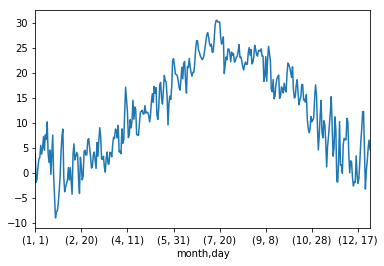

In [82]:
daily_mean_jfk.plot() # Series.plot()

In [83]:
daily_mean_jfk = daily_mean_jfk.reset_index()
daily_mean_jfk.head()

,month,day,tempC
0,1,1,3.817391
1,1,2,-1.920833
2,1,3,-1.237500
3,1,4,1.129167
4,1,5,2.720833


In [84]:
# set index to datetime index (parse (month and day) to date)
daily_mean_jfk.index = pd.to_datetime(dict(
    year=2013,
    month=daily_mean_jfk.month,
    day=daily_mean_jfk.day
))
daily_mean_jfk.head()

,month,day,tempC
2013-01-01,1,1,3.817391
2013-01-02,1,2,-1.920833
2013-01-03,1,3,-1.237500
2013-01-04,1,4,1.129167
2013-01-05,1,5,2.720833


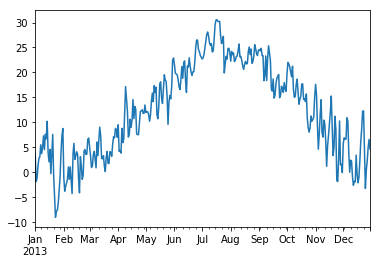

In [85]:
daily_mean_jfk.tempC.plot()

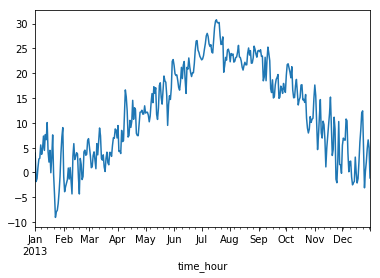

In [88]:
# alternatively:
weather2 = weather.copy()
weather2.index =  pd.to_datetime(weather2["time_hour"])
weather2.query("origin=='JFK'").resample("D").tempC.mean().plot()

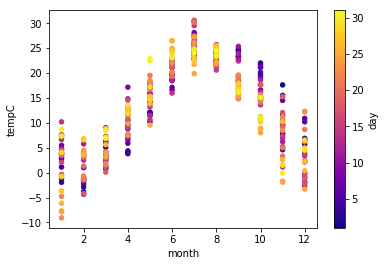

In [93]:
fig, ax = plt.subplots()
(
    weather
    .query("origin=='JFK'")
    .groupby(['month','day'])
    .tempC
    .mean()
    .reset_index()
    # DataFrame[month,day,tempC]
    .plot(kind='scatter',x='month',y='tempC',c='day',colormap='plasma',ax=ax)
)

* Choose days with greater mean temperature than in the preceding day.

In [101]:
daily_mean_jfk.loc[daily_mean_jfk.tempC > daily_mean_jfk.tempC.shift(1),:].head()

,month,day,tempC
2013-01-03,1,3,-1.237500
2013-01-04,1,4,1.129167
2013-01-05,1,5,2.720833
2013-01-06,1,6,3.029167
2013-01-07,1,7,5.479167


In [100]:
daily_mean_jfk.tempC.shift(1).head()

2013-01-01         NaN
2013-01-02    3.817391
2013-01-03   -1.920833
2013-01-04   -1.237500
2013-01-05    1.129167
Name: tempC, dtype: float64

In [99]:
daily_mean_jfk.tempC.head()

2013-01-01    3.817391
2013-01-02   -1.920833
2013-01-03   -1.237500
2013-01-04    1.129167
2013-01-05    2.720833
Name: tempC, dtype: float64

In [102]:
daily_mean_jfk.tempC.diff().head()

2013-01-01         NaN
2013-01-02   -5.738225
2013-01-03    0.683333
2013-01-04    2.366667
2013-01-05    1.591667
Name: tempC, dtype: float64

In [103]:
daily_mean_jfk.loc[daily_mean_jfk.tempC.diff()>0,:].head()

,month,day,tempC
2013-01-03,1,3,-1.237500
2013-01-04,1,4,1.129167
2013-01-05,1,5,2.720833
2013-01-06,1,6,3.029167
2013-01-07,1,7,5.479167


* Find 5 hottest days.

In [104]:
daily_mean_jfk.sort_values(['tempC'], ascending=False).head(5)

,month,day,tempC
2013-07-17,7,17,30.579167
2013-07-16,7,16,30.483333
2013-07-20,7,20,30.245833
2013-07-18,7,18,30.241667
2013-07-19,7,19,30.187500


In [105]:
daily_mean_jfk.nlargest(5, 'tempC')

,month,day,tempC
2013-07-17,7,17,30.579167
2013-07-16,7,16,30.483333
2013-07-20,7,20,30.245833
2013-07-18,7,18,30.241667
2013-07-19,7,19,30.187500


In [ ]:
# recommended reading (skim through):
# https://pandas.pydata.org/pandas-docs/stable/reference/series.html
# https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
# https://pandas.pydata.org/pandas-docs/stable/reference/indexing.html
# https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

In [109]:
# now missing data imputation:

In [109]:
weather.tempC.interpolate(method='linear', axis=0, limit_area='inside').head(10)

0    2.8
1    2.8
2    3.3
3    3.3
4    3.3
5    3.9
6    3.9
7    3.9
8    4.4
9    3.9
Name: tempC, dtype: float64

In [124]:
weather2.query("origin=='JFK'").tempC.head(10)

time_hour
2013-01-01 01:00:00    3.3
2013-01-01 02:00:00    3.3
2013-01-01 03:00:00    3.9
2013-01-01 04:00:00    3.9
2013-01-01 05:00:00    3.9
2013-01-01 07:00:00    3.9
2013-01-01 08:00:00    3.9
2013-01-01 09:00:00    4.4
2013-01-01 10:00:00    4.4
2013-01-01 11:00:00    3.9
Name: tempC, dtype: float64

In [126]:
weather2 = weather.copy()
weather2.index =  pd.to_datetime(weather2["time_hour"])
daily_mean_jfk = weather2.query("origin=='JFK'").tempC.resample("H").interpolate('linear').resample("D").mean()

In [127]:
#type(weather2.query("origin=='JFK'").resample("H")).__bases__[0].__bases__

In [128]:
# i = 0
# for e in x:
#     print(e)
#     i += 1
#     if i > 10: break

In [130]:
weather_jfk = weather.query('origin=="JFK"')
all_dates = pd.date_range("2013-01-01 00:00:00", periods=24*365, freq="H")
cur_dates = pd.to_datetime(weather_jfk.loc[:,["year","month","day","hour"]])
# all\cur
missing_dates = all_dates[~all_dates.isin(cur_dates)]
# split datetime64 data into [year,month,date,hour] "fields" (4 Series objects)
missing_dates = pd.DataFrame(dict(
    year=missing_dates.year,
    month=missing_dates.month,
    day=missing_dates.day,
    hour=missing_dates.hour,
    tempC=np.nan))
missing_dates.head()

,year,month,day,hour,tempC
0,2013,1,1,5,NaN
1,2013,2,21,5,NaN
2,2013,3,5,6,NaN
3,2013,3,31,1,NaN
4,2013,4,3,0,NaN


In [131]:
missing_dates.head()
weather_jfk = pd.concat((weather_jfk, missing_dates), axis=0).\
    sort_values(["year","month", "day","hour"]).reset_index(drop=True)
weather_jfk["tempC"] = weather_jfk["tempC"].interpolate()
aveday = weather_jfk.groupby(["year","month","day"])["tempC"].mean().reset_index()

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


# SQL connectivity

In [133]:
import sqlite3 # zero-conf, lightweight, flat-file DB

conn = sqlite3.connect("/tmp/nycflight13.sqlite")

In [134]:
conn

In [135]:


weather = pd.read_csv(
    "http://www.gagolewski.com/resources/data/nycflights13_weather.csv.gz",
                          comment="#")
flights = pd.read_csv(
    "http://www.gagolewski.com/resources/data/nycflights13_flights.csv.gz",
                          comment="#")
airports = pd.read_csv(
    "http://www.gagolewski.com/resources/data/nycflights13_airports.csv.gz",
                          comment="#")
airlines = pd.read_csv(
    "http://www.gagolewski.com/resources/data/nycflights13_airlines.csv.gz",
                          comment="#")
planes = pd.read_csv(
    "http://www.gagolewski.com/resources/data/nycflights13_planes.csv.gz",
                          comment="#")



In [137]:
flights.shape

(336776, 19)

In [138]:
flights.head(1)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00


In [140]:
airlines.query('carrier=="UA"')

,carrier,name
11,UA,United Air Lines Inc.


In [141]:
planes.query('tailnum=="N14228"')

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
177,N14228,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan


In [142]:
airports.query('faa=="EWR"')

,faa,name,lat,lon,alt,tz,dst,tzone
460,EWR,Newark Liberty Intl,40.6925,-74.168667,18,-5,A,America/New_York


In [143]:
# Let's use a low-level Python iface to export airlines to SQL db
airlines.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [144]:
conn.execute("""
CREATE TABLE airlines_temp (
    carrier CHAR(2) PRIMARY KEY,
    name VARCHAR(64)
)
""")

conn.commit()

In [147]:
list(airlines.to_records(index=False))[:3]

[('9E', 'Endeavor Air Inc.'),
 ('AA', 'American Airlines Inc.'),
 ('AS', 'Alaska Airlines Inc.')]

In [149]:
# INSERT INTO airlines_temp (carrier, name) VALUES ('9E', 'Endeavor Air Inc.'),
#  ('AA', 'American Airlines Inc.'),
#  ('AS', 'Alaska Airlines Inc.')
conn.executemany("""
INSERT INTO airlines_temp (carrier, name) VALUES (?, ?)
""", airlines.to_records(index=False))

conn.commit()

In [150]:
cur = conn.execute("SELECT * FROM airlines_temp WHERE name LIKE '%america%'")
res = cur.fetchall()

In [151]:
res

[('AA', 'American Airlines Inc.'), ('VX', 'Virgin America')]

In [153]:
pd.DataFrame.from_records(res)

,0,1
0,AA,American Airlines Inc.
1,VX,Virgin America


# Pandas iface to SQL

In [155]:
#import sqlite3 
#conn = sqlite3.connect("/tmp/nycflight13.sqlite")

weather.to_sql("weather", conn)
flights.to_sql("flights", conn)
airports.to_sql("airports", conn)
airlines.to_sql("airlines", conn)
planes.to_sql("planes", conn)
# CREATE TABLE + INSERT INTO....

In [156]:
pd.read_sql_query("""
SELECT * FROM airlines WHERE name LIKE '%america%'
""", conn)

,index,carrier,name
0,1,AA,American Airlines Inc.
1,13,VX,Virgin America


In [ ]:
# conn.close()

   1. `SELECT DISTINCT engine FROM planes`
   

In [159]:
planes.loc[:,['engine']].drop_duplicates().reset_index(drop=True)

,engine
0,Turbo-fan
1,Turbo-jet
2,Reciprocating
3,4 Cycle
4,Turbo-shaft
5,Turbo-prop


In [162]:
pd.DataFrame(planes.engine.unique(),columns=['engine'])

,engine
0,Turbo-fan
1,Turbo-jet
2,Reciprocating
3,4 Cycle
4,Turbo-shaft
5,Turbo-prop


   2. `SELECT DISTINCT type, engine FROM planes`

In [167]:
planes.loc[:,['engine','type']].drop_duplicates().reset_index(drop=True)

,engine,type
0,Turbo-fan,Fixed wing multi engine
1,Turbo-jet,Fixed wing multi engine
2,Reciprocating,Fixed wing single engine
3,Reciprocating,Fixed wing multi engine
4,4 Cycle,Fixed wing single engine
5,Turbo-shaft,Rotorcraft
6,Turbo-prop,Fixed wing multi engine


   3. `SELECT COUNT(*), engine FROM planes GROUP BY engine`

In [175]:
planes.groupby('engine').size().rename('count').reset_index()

,engine,count
0,4 Cycle,2
1,Reciprocating,28
2,Turbo-fan,2750
3,Turbo-jet,535
4,Turbo-prop,2
5,Turbo-shaft,5


In [178]:
planes.engine.value_counts().reset_index().rename(dict(index='engine',engine='count'),axis=1)

,engine,count
0,Turbo-fan,2750
1,Turbo-jet,535
2,Reciprocating,28
3,Turbo-shaft,5
4,4 Cycle,2
5,Turbo-prop,2


   4. `SELECT COUNT(*), engine, type FROM planes GROUP BY engine, type`

In [179]:
planes.groupby(['engine','type']).size().rename('count').reset_index()

,engine,type,count
0,4 Cycle,Fixed wing single engine,2
1,Reciprocating,Fixed wing multi engine,5
2,Reciprocating,Fixed wing single engine,23
3,Turbo-fan,Fixed wing multi engine,2750
4,Turbo-jet,Fixed wing multi engine,535
5,Turbo-prop,Fixed wing multi engine,2
6,Turbo-shaft,Rotorcraft,5


   5. `SELECT MIN(year), AVG(year), MAX(year), engine, manufacturer FROM planes GROUP BY engine, manufacturer`

In [197]:
y = planes.groupby(['engine','manufacturer']).agg({'year':[np.min, np.mean,np.max]})
y.columns = y.columns.droplevel()
y.head()


amin    mean    amax
engine        manufacturer                                 
4 Cycle       CESSNA                 1975.0  1975.0  1975.0
              JOHN G HESS               NaN     NaN     NaN
Reciprocating AMERICAN AIRCRAFT INC     NaN     NaN     NaN
              AVIAT AIRCRAFT INC     2007.0  2007.0  2007.0
              BARKER JACK L             NaN     NaN     NaN

In [186]:
planes.groupby(['engine','manufacturer']).year.describe().loc[:,['min','mean','max']].head()

min    mean     max
engine        manufacturer                                 
4 Cycle       CESSNA                 1975.0  1975.0  1975.0
              JOHN G HESS               NaN     NaN     NaN
Reciprocating AMERICAN AIRCRAFT INC     NaN     NaN     NaN
              AVIAT AIRCRAFT INC     2007.0  2007.0  2007.0
              BARKER JACK L             NaN     NaN     NaN

# Extra exercises

Consider the `birth_dates` data set. Write a function that
returns the names of people which -- at a given date -- have already been born
but are less than 16 years of age.

6. `SELECT * FROM planes WHERE speed IS NOT NULL`

In [219]:
pd.__version__

'0.24.0'

In [208]:
planes.loc[~planes.speed.isna(),:].reset_index(drop=True).head(1) # ==isnull()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N201AA,1959.0,Fixed wing single engine,CESSNA,150,1,2,90.0,Reciprocating


In [207]:
planes.query('speed!="NaN"').head(1)

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
424,N201AA,1959.0,Fixed wing single engine,CESSNA,150,1,2,90.0,Reciprocating


In [215]:
planes.query('speed==speed').head(1).shape

(1, 9)

In [217]:
np.nan == np.nan

False

7. `SELECT tailnum FROM planes WHERE seats BETWEEN 150 AND 190 AND year >= 2012`

In [221]:
planes.query('150 <= seats <= 190 and year >= 2012')[["tailnum"]].reset_index(drop=True).\
head(1)

,tailnum
0,N361VA


In [224]:
planes.loc[ (planes.seats.between(150,190))&(planes.year>=2012),["tailnum"] ].head(1)

,tailnum
875,N361VA


8. `SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER") AND seats>390`

In [227]:
planes.query('manufacturer in ("BOEING", "AIRBUS", "EMBRAER") and seats>390').\
reset_index(drop=True).head(1)

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N206UA,1999.0,Fixed wing multi engine,BOEING,777-222,2,400,NaN,Turbo-fan


In [231]:
planes.loc[planes.manufacturer.isin(["BOEING", "AIRBUS", "EMBRAER"]) & \
           (planes.seats>390),:].reset_index(drop=True).head(1)

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N206UA,1999.0,Fixed wing multi engine,BOEING,777-222,2,400,NaN,Turbo-fan


9. `SELECT DISTINCT year, seats  FROM planes WHERE year >= 2012 ORDER BY year ASC, seats DESC`

In [232]:
planes.loc[planes.year>=2012, ["year","seats"]].drop_duplicates().\
sort_values(['year', 'seats'], ascending=[True,False]).reset_index(drop=True)

,year,seats
0,2012.0,379
1,2012.0,377
2,2012.0,260
3,2012.0,222
4,2012.0,200
5,2012.0,191
6,2012.0,182
7,2012.0,149
8,2012.0,140
9,2012.0,20


10. `SELECT DISTINCT year, seats  FROM planes WHERE year >= 2012 ORDER BY seats DESC, year ASC`

In [233]:
planes.loc[planes.year>=2012, ["year","seats"]].drop_duplicates().\
sort_values([ 'seats','year'], ascending=[False,True]).reset_index(drop=True)

,year,seats
0,2012.0,379
1,2013.0,379
2,2012.0,377
3,2013.0,377
4,2012.0,260
5,2012.0,222
6,2013.0,222
7,2012.0,200
8,2013.0,200
9,2013.0,199


11. `SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer`
12. `SELECT manufacturer, COUNT(*) FROM planes GROUP BY manufacturer HAVING COUNT(*) > 10`
13. `SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer HAVING COUNT(*) > 10`

In [234]:
planes.query("seats>200").groupby("manufacturer").size().rename("count").\
reset_index().query("count>10").reset_index(drop=True)

,manufacturer,count
0,AIRBUS,66
1,BOEING,225


In [237]:
x = planes.query("seats>200").groupby("manufacturer").size().rename("count").\
reset_index()
x.loc[x["count"]>10,:]

,manufacturer,count
0,AIRBUS,66
2,BOEING,225


14. `SELECT manufacturer, COUNT(*) AS howmany FROM planes GROUP BY manufacturer ORDER BY howmany DESC LIMIT 5`

In [239]:
planes.groupby('manufacturer').size().rename('howmany').sort_values(ascending=False).\
reset_index().head(5)

,manufacturer,howmany
0,BOEING,1630
1,AIRBUS INDUSTRIE,400
2,BOMBARDIER INC,368
3,AIRBUS,336
4,EMBRAER,299


In [240]:
planes.groupby('manufacturer').size().rename('howmany').nlargest(5).reset_index()

,manufacturer,howmany
0,BOEING,1630
1,AIRBUS INDUSTRIE,400
2,BOMBARDIER INC,368
3,AIRBUS,336
4,EMBRAER,299


15. `SELECT * FROM flights LEFT JOIN planes ON flights.tailnum=planes.tailnum`

In [243]:
pd.merge(flights, planes, on='tailnum', how='left').head(1)

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,minute,time_hour,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,15,2013-01-01 05:00:00,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan


In [244]:
flights.merge(planes, on='tailnum', how='left').head(1)

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,minute,time_hour,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,15,2013-01-01 05:00:00,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan


16.

  ```
  SELECT planes.*, airlines.* FROM
   (SELECT DISTINCT carrier, tailnum FROM flights) AS cartail
  INNER JOIN planes ON cartail.tailnum=planes.tailnum
  INNER JOIN airlines ON cartail.carrier=airlines.carrier
  ```
  

In [245]:
flights.loc[:,['carrier','tailnum']].drop_duplicates().\
merge(airlines, on='carrier', how='inner').\
merge(planes, on='tailnum', how='inner').head(1)

,carrier,tailnum,name,year,type,manufacturer,model,engines,seats,speed,engine
0,UA,N14228,United Air Lines Inc.,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan


  ```
  SELECT flights2.*, weather2.atemp, weather2.ahumid, weather2.apressure FROM
     (SELECT * FROM flights WHERE origin='EWR') AS flights2
  LEFT JOIN
     (SELECT year, month, day, AVG(temp) AS atemp,
       AVG(humid) AS ahumid, AVG(pressure) AS apressure
      FROM weather WHERE origin='EWR' GROUP BY year, month, day) AS weather2
  ON flights2.year=weather2.year
    AND flights2.month=weather2.month
    AND flights2.day=weather2.day
  ```

```
flights2 = (SELECT * FROM flights WHERE origin='EWR') 

weather2 = (SELECT year, month, day, AVG(temp) AS atemp,
       AVG(humid) AS ahumid, AVG(pressure) AS apressure
      FROM weather WHERE origin='EWR' GROUP BY year, month, day)

SELECT flights2.*, weather2.atemp, weather2.ahumid, weather2.apressure
FROM
     flights2
  LEFT JOIN
     weather2
  ON flights2.year=weather2.year
    AND flights2.month=weather2.month
    AND flights2.day=weather2.day
```

In [256]:
flights2 = flights.query('origin=="EWR"')
weather2 = weather.query('origin=="EWR"').\
    groupby(['year','month','day'])[["temp", "humid", "pressure"]].\
    mean().rename(dict(temp='atemp', humid='ahumid', pressure='apressure'),axis=1).\
    reset_index()

In [257]:
flights2.merge(weather2, on=['year','month','day'], how='left').head(1)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,atemp,ahumid,apressure
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,38.48,58.386087,1012.442857


In [258]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

In [259]:
tables = pd.read_html("https://en.wikipedia.org/wiki/Warsaw")
len(tables)

61

In [263]:
ww = tables[2]

In [264]:
ww

Climate data for Warsaw (Warsaw Chopin Airport), elevation: 106 m, 1981-2010 normals, extremes 1951-present  \
                                                                                                        Month   
0                                Record high °C (°F)                                                            
1                               Average high °C (°F)                                                            
2                                 Daily mean °C (°F)                                                            
3                                Average low °C (°F)                                                            
4                                 Record low °C (°F)                                                            
5                  Average precipitation mm (inches)                                                            
6                         Average precipitation days                                                            
7                       Source #1: Pogoda.ru.net[61]                                                            
8                                Source #2: KNMI[62]                                                            

                                                               \
                            Jan                           Feb   
0                    13.8(56.8)                    17.2(63.0)   
1                     0.6(33.1)                     1.9(35.4)   
2                    −1.8(28.8)                    −0.6(30.9)   
3                    −4.2(24.4)                    −3.6(25.5)   
4                  −30.7(−23.3)                  −27.6(−17.7)   
5                       27(1.1)                       26(1.0)   
6                            12                            11   
7  Source #1: Pogoda.ru.net[61]  Source #1: Pogoda.ru.net[61]   
8           Source #2: KNMI[62]           Source #2: KNMI[62]   

                                                               \
                            Mar                           Apr   
0                    22.9(73.2)                    30.5(86.9)   
1                     6.6(43.9)                    13.6(56.5)   
2                     2.8(37.0)                     8.7(47.7)   
3                    −0.6(30.9)                     3.9(39.0)   
4                   −22.6(−8.7)                    −6.9(19.6)   
5                       31(1.2)                       34(1.3)   
6                            12                            13   
7  Source #1: Pogoda.ru.net[61]  Source #1: Pogoda.ru.net[61]   
8           Source #2: KNMI[62]           Source #2: KNMI[62]   

                                                               \
                            May                           Jun   
0                    32.8(91.0)                    35.1(95.2)   
1                    19.5(67.1)                    21.9(71.4)   
2                    14.2(57.6)                    17.0(62.6)   
3                     8.9(48.0)                    11.8(53.2)   
4                    −3.1(26.4)                     1.8(35.2)   
5                       56(2.2)                       69(2.7)   
6                            14                            15   
7  Source #1: Pogoda.ru.net[61]  Source #1: Pogoda.ru.net[61]   
8           Source #2: KNMI[62]           Source #2: KNMI[62]   

                                                               \
                            Jul                           Aug   
0                    36.0(96.8)                    37.1(98.8)   
1                    24.4(75.9)                    23.9(75.0)   
2                    19.2(66.6)                    18.3(64.9)   
3                    13.9(57.0)                    13.1(55.6)   
4                     4.6(40.3)                     3.0(37.4)   
5                       73(2.9)                       64(2.5)   
6                            14                            13   
7  Source #1: Pogoda.ru.n